In [2]:
import pathlib
from pathlib import Path
import numpy as np
import torch.nn as nn

import torch
import torch.utils.data
import matplotlib.pyplot as plt
from utils import AvgrageMeter, make_latent_dataset, balanced_accuracy
from models.autoencoder import Autoencoder
from main import train_classifier

In [3]:
"""
model = torch.load("trained_models/conv_autoencoder_104")
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

latent_train, latent_test = make_latent_dataset(model)
"""

'\nmodel = torch.load("trained_models/conv_autoencoder_104")\ntotal_params = sum(p.numel() for p in model.parameters())\nprint(total_params)\n\nlatent_train, latent_test = make_latent_dataset(model)\n'

In [4]:
# torch.save(latent_train, "latent_train")
# torch.save(latent_test, "latent_test")

In [7]:
data_path = Path('data/latent_104/')

# BOHB found this

"""
learning_rate = 0.0006165680533677391
first_hidden = 716
second_hidden = 329
weight_decay = 7.566545238707571e-10
batch_size = 27
"""
# long run 50 epochs
batch_size = 409
dropout_p = 0.02329095668992329
first_hidden = 723
learning_rate = 0.001350024296083107
second_hidden = 543 
weight_decay = 5.190390346158911e-15

In [ ]:
test_dataset = torch.load(data_path / 'latent_test')
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

criterion = balanced_accuracy
test_obj = AvgrageMeter()

while True:
    model, history = train_classifier(data_path, num_epochs=20, 
                                      first_hidden=first_hidden, second_hidden=second_hidden,
                                      learning_rate=learning_rate, weight_decay=weight_decay, 
                                      batch_size=batch_size, dropout_p=dropout_p, verbose=True)

    for images, labels in test_loader:
        predictions = model(images)
        loss = criterion(predictions, labels)
        test_obj.update(loss.item(), len(images))

    print(test_obj.avg)

Epoch 0, LOSS: train 1.2129 test 1.1621. ACCURACY: train 0.6872 test 0.6957
Epoch 1, LOSS: train 0.5991 test 0.8636. ACCURACY: train 0.8369 test 0.7665
Epoch 2, LOSS: train 0.4525 test 0.7492. ACCURACY: train 0.8741 test 0.7978
Epoch 3, LOSS: train 0.3749 test 0.6801. ACCURACY: train 0.8952 test 0.8181
Epoch 4, LOSS: train 0.3249 test 0.6337. ACCURACY: train 0.9086 test 0.8306
Epoch 5, LOSS: train 0.2867 test 0.5996. ACCURACY: train 0.9191 test 0.8418
Epoch 6, LOSS: train 0.2569 test 0.5769. ACCURACY: train 0.9273 test 0.8463
Epoch 7, LOSS: train 0.2308 test 0.5598. ACCURACY: train 0.9338 test 0.8528
Epoch 8, LOSS: train 0.2093 test 0.5513. ACCURACY: train 0.9395 test 0.8551
Epoch 9, LOSS: train 0.1904 test 0.5470. ACCURACY: train 0.9444 test 0.8592
Epoch 10, LOSS: train 0.1746 test 0.5516. ACCURACY: train 0.9485 test 0.8614
Epoch 11, LOSS: train 0.1584 test 0.5473. ACCURACY: train 0.9533 test 0.8634
Epoch 12, LOSS: train 0.1443 test 0.5278. ACCURACY: train 0.9571 test 0.8685
Epoch 13,

In [6]:
history

array([[1.05692395, 1.08555521, 0.71857638, 0.71030171],
       [0.58811047, 0.87489695, 0.83671809, 0.76576647],
       [0.47648954, 0.79397815, 0.86660211, 0.78844009],
       [0.41470883, 0.73221347, 0.88280077, 0.80294186],
       [0.37600996, 0.70574436, 0.89262152, 0.81230705],
       [0.34667473, 0.68052257, 0.89971812, 0.82117934],
       [0.32360739, 0.67020695, 0.90654358, 0.82610839],
       [0.30775294, 0.67171505, 0.90999935, 0.82891016],
       [0.29112878, 0.67047006, 0.91453532, 0.83119309],
       [0.27849531, 0.66979025, 0.91746606, 0.83261992],
       [0.26745566, 0.66935368, 0.92100359, 0.83173788],
       [0.26031446, 0.66760052, 0.92275945, 0.83391704],
       [0.25257079, 0.66503864, 0.9247477 , 0.83596648],
       [0.24498236, 0.6801791 , 0.92613776, 0.83749708],
       [0.23936485, 0.68052353, 0.92807006, 0.83529198],
       [0.23119318, 0.67676526, 0.92995072, 0.83832724],
       [0.22734156, 0.68922779, 0.93097497, 0.83731548],
       [0.22375127, 0.69121967,

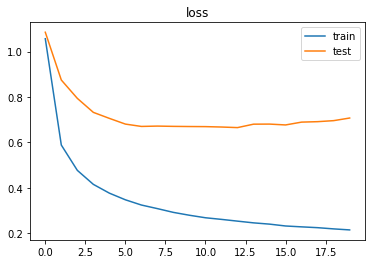

In [7]:
plt.title("loss")
plt.plot(history[:, 0], label="train")
plt.plot(history[:, 1], label="test")
plt.legend()
plt.show()

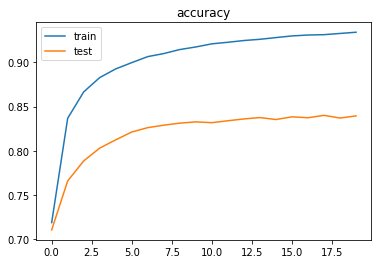

In [8]:
plt.title("accuracy")
plt.plot(history[:, 2], label="train")
plt.plot(history[:, 3], label="test")
plt.legend()
plt.show()

In [9]:
test_dataset = torch.load(data_path / 'latent_test')
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [10]:
criterion = balanced_accuracy
test_obj = AvgrageMeter()

In [11]:
for images, labels in test_loader:
    predictions = model(images)
    loss = criterion(predictions, labels)
    test_obj.update(loss.item(), len(images))

In [12]:
test_obj.avg

0.8382222077152767